# import

In [1]:
import pandas as pd
import numpy as np
import os
from keras import models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import yaml

2025-03-07 13:56:38.646749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-07 13:56:38.646774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-07 13:56:38.647505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 13:56:38.652438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 13:56:39.279052: W tensorflow/compiler/tf2

# functions

In [2]:
def load_config(config_path="config.yaml"):
    """
    Loads configuration from a YAML file.

    Parameters:
    - config_path (str): Path to the YAML configuration file.

    Returns:
    - dict: Dictionary with configuration parameters.
    """
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

# params

In [3]:
proj_path="/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/"

In [4]:
params = load_config("/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/phase3/config_test_views.yaml")
print(params)

{'path_model': 'results/phase1/AT_densenet+cbam_exp/0_DenseNet201/', 'path_full_labels': '/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1', 'path_test': 'BD/CPD1_TEST_VIEW/', 'save_dir': 'results/phase3/', 'save': 1, 'verbose': 1, 'size': 224}


# categories

In [5]:

categories = sorted(os.listdir(params['path_full_labels']))
for idx, i in enumerate(categories):
    print(idx, i)

0 asphodelus
1 calicotome
2 castanea
3 ceratonia
4 ebenus
5 erica
6 eucalyptus
7 ferula
8 myrtus
9 olea
10 origanum
11 oxalis
12 pinus
13 pistacia
14 salvia
15 satureja
16 sinapis
17 thymbra
18 urginea
19 vitis


In [6]:
categories

['asphodelus',
 'calicotome',
 'castanea',
 'ceratonia',
 'ebenus',
 'erica',
 'eucalyptus',
 'ferula',
 'myrtus',
 'olea',
 'origanum',
 'oxalis',
 'pinus',
 'pistacia',
 'salvia',
 'satureja',
 'sinapis',
 'thymbra',
 'urginea',
 'vitis']

In [7]:
path=params['path_test']
path

'BD/CPD1_TEST_VIEW/'

In [8]:
name_test = os.path.basename(os.path.normpath(path))  # Obtém o último diretório do caminho
name_test

'CPD1_TEST_VIEW'

In [9]:
path_save=f"{params['save_dir']}{name_test}/"
print(f"path_dst: {path_save}")

path_dst: results/phase3/CPD1_TEST_VIEW/


In [10]:
os.makedirs(path_save, exist_ok=True) 

In [11]:
path=params['path_model']
name_model = os.path.basename(os.path.normpath(path))  # Obtém o último diretório do modelo
path_save=f"{path_save}{name_model}/"
os.makedirs(path_save, exist_ok=True) 
print(f"path_dst: {path_save}")

path_dst: results/phase3/CPD1_TEST_VIEW/0_DenseNet201/


In [12]:
k=1

# Load model

In [13]:
path_model = params['path_model']
nm_model= path_model.split("/")[-2]
path = f"{proj_path}{path_model}{nm_model}_bestLoss_{k}.keras"
print(f"\n[INFO] path_model: {path}\n")


[INFO] path_model: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase1/AT_densenet+cbam_exp/0_DenseNet201/0_DenseNet201_bestLoss_1.keras



In [14]:
model=None
model = models.load_model(path)
model.summary()  # Print model summary

2025-03-07 13:56:40.989929: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:56:41.099700: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 13:56:41.099841: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

# Functions

In [15]:
def load_data_test_vw(test_dir, input_size, batch_size=32):
    idg = ImageDataGenerator(rescale=1.0 / 255)
    test_generator = idg.flow_from_directory(
        test_dir,
        target_size=input_size,
        class_mode="categorical",
        shuffle=False,
        batch_size=batch_size
    )
    return test_generator

def generate_classification_report_vw(model, cat_model, test_generator, output_csv="relatorio.csv"):
    """
    Gera um relatório de classificação e salva como CSV.
    """
    y_true = test_generator.classes  
    test_class_names = list(test_generator.class_indices.keys())  
    label_mapping = {test_class_names[i]: cat_model.index(test_class_names[i]) for i in range(len(test_class_names))}
    y_true_mapped = np.array([label_mapping[test_class_names[i]] for i in y_true])
    predictions = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    present_labels = sorted(set(y_true_mapped))  
    report = classification_report(y_true_mapped, y_pred, labels=present_labels, 
                                   target_names=[cat_model[i] for i in present_labels], 
                                   output_dict=True, zero_division=0)
    df_report = pd.DataFrame(report).transpose()
    df_report.to_csv(output_csv)
    print(f"✅ Relatório salvo em: {output_csv}")

def generate_confusion_matrix(y_true_mapped, categories, y_pred, present_labels, normalize=False):
    """
    Generates and displays a confusion matrix, ensuring alignment between true categories 
    and predicted labels. Highlights missing classes and misclassified cases.
    Parameters:
        y_true_mapped (array-like): True labels mapped to indices.
        categories (list): List of all class names.
        y_pred (array-like): Predicted labels.
        present_labels (list): Sorted list of labels present in the test set.
        normalize (bool, optional): Whether to normalize the confusion matrix values. Defaults to False.
    Returns:
        fig (matplotlib.figure.Figure): The generated confusion matrix figure.
        df_cm (pandas.DataFrame): Confusion matrix as a DataFrame.
    """
    num_classes = len(categories)  # Total number of possible classes
    absent_labels = sorted(set(range(num_classes)) - set(present_labels))
    
    # Ensure predictions are within valid range
    y_pred_clipped = np.clip(y_pred, 0, num_classes - 1)
    
    # Reduced confusion matrix (only for present classes)
    cm_reduced = confusion_matrix(y_true_mapped, y_pred_clipped, labels=present_labels)
    
    # Normalize if required
    if normalize:
        cm_reduced = np.divide(cm_reduced.astype('float'), cm_reduced.sum(axis=1, keepdims=True), 
                               where=cm_reduced.sum(axis=1, keepdims=True) != 0)
    
    # Create full-size confusion matrix (num_classes x num_classes)
    full_cm = np.zeros((num_classes, num_classes))
    for i, real in enumerate(present_labels):
        for j, pred in enumerate(present_labels):
            full_cm[real, pred] = cm_reduced[i, j]
    
    # Handle predictions for absent classes
    for i, pred in enumerate(y_pred_clipped):
        if pred not in present_labels:
            full_cm[y_true_mapped[i], pred] += 1
    
    # Create a DataFrame correctly aligned
    df_cm = pd.DataFrame(full_cm, index=categories, columns=categories)
    
    # Generate heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.color_palette("Blues", as_cmap=True)  
    mat = full_cm  # Alias for readability
    sns.heatmap(mat, annot=True, fmt=".2f" if normalize else "g", cmap=cmap, 
                xticklabels=categories, yticklabels=categories, cbar=True, linewidths=0.5, ax=ax)
    
    # Highlight missing labels and adjust rotation
    for i in absent_labels:
        ax.get_yticklabels()[i].set_backgroundcolor("yellow")  
        ax.get_xticklabels()[i].set_backgroundcolor("yellow")  
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)  # Fixed rotation
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=0)
    
    # Annotate non-diagonal cells with custom background and text color
    for i in range(len(mat)):
        for j in range(len(mat)):
            value = mat[i, j]
            if i != j:  # Only for off-diagonal elements
                if value > 0:
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='lightcoral', alpha=0.5))
                ax.text(j + 0.5, i + 0.5, f'{value:.2f}' if normalize else f'{int(value)}', 
                        ha='center', va='center', color='black', fontsize=10)
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix" + (" (Normalized)" if normalize else "") + "\n(Yellow = Missing Classes)")
    plt.tight_layout()
    return fig, df_cm

In [42]:
def generate_classification_report(y_true_mapped, categories, y_pred, present_labels, output_csv="relatorio.csv"):
    """
    Generates a classification report and saves it as a CSV file.
    Parameters:
        y_true_mapped (array-like): True labels mapped to indices.
        categories (list): List of category names.
        y_pred (array-like): Predicted labels.
        present_labels (list): List of labels present in the predictions.
        output_csv (str, optional): File path to save the CSV report. Defaults to "relatorio.csv".
    Returns:
        pd.DataFrame: Classification report as a DataFrame.
    """
    # Ensure all categories are included in the report
    all_labels = list(range(len(categories)))  # All possible labels (indices)
    
    # Generate the classification report
    report = classification_report(
        y_true_mapped, 
        y_pred, 
        labels=all_labels,  # Use all possible labels
        target_names=categories,  # Use all category names
        output_dict=True, 
        zero_division=0  # Handle division by zero for missing classes
    )
    
    # Convert the report to a DataFrame
    df_report = pd.DataFrame(report).transpose()
    
    # Save the report to a CSV file
    df_report.to_csv(output_csv, index=True, sep=',', decimal='.')
    
    return df_report

# Polar view

In [16]:
view="POLAR"
path_test=f"{params['path_test']}k{k}/"
view_dir = f"{proj_path}{path_test}{view}/" 
print(f"view_dir: {view_dir}")

view_dir: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_VIEW/k1/POLAR/


In [17]:
input_size = (224, 224)  

test_generator = load_data_test_vw(view_dir, input_size)

Found 193 images belonging to 13 classes.


In [18]:
y_true = test_generator.classes  
y_true

array([ 0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12], dtype=int32)

In [19]:
filenames = test_generator.filenames
filenames

['asphodelus/Asp.A.ramX400wF(1985)(0)B-2.png',
 'asphodelus/Asp.A.ramX400wF(1990)(0)G-2.png',
 'calicotome/Fab.C.vilX400wF(2016)(0)A-18.png',
 'calicotome/Fab.C.vilX400wF(2016)(0)A-8.png',
 'calicotome/Fab.C.vilX400wF(2017)(0)B-19.png',
 'calicotome/Fab.C.vilX400wF(2017)(0)B-2.png',
 'calicotome/Fab.C.vilX400wF(2017)(0)B-21.png',
 'calicotome/Fab.C.vilX400wF(2017)(0)B-5.png',
 'calicotome/Fab.C.vilX400wF(2018)(0)C-17.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-101.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-120.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-15.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-17.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-24.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-34.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-42.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-43.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-50.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-53.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-54.png',
 'calicotome/Fab.C.vilX400wF(2019)(0)D-99.p

In [20]:
df = pd.DataFrame(filenames, columns=['file'])
confidences = [] 

In [21]:
test_class_names = list(test_generator.class_indices.keys())  
test_class_names

['asphodelus',
 'calicotome',
 'erica',
 'eucalyptus',
 'ferula',
 'myrtus',
 'origanum',
 'oxalis',
 'pinus',
 'salvia',
 'satureja',
 'thymbra',
 'vitis']

In [22]:
categories = sorted(os.listdir(params['path_full_labels']))
for idx, i in enumerate(categories):
    print(idx, i)

0 asphodelus
1 calicotome
2 castanea
3 ceratonia
4 ebenus
5 erica
6 eucalyptus
7 ferula
8 myrtus
9 olea
10 origanum
11 oxalis
12 pinus
13 pistacia
14 salvia
15 satureja
16 sinapis
17 thymbra
18 urginea
19 vitis


In [23]:
label_mapping = {test_class_names[i]: categories.index(test_class_names[i]) for i in range(len(test_class_names))}
label_mapping

{'asphodelus': 0,
 'calicotome': 1,
 'erica': 5,
 'eucalyptus': 6,
 'ferula': 7,
 'myrtus': 8,
 'origanum': 10,
 'oxalis': 11,
 'pinus': 12,
 'salvia': 14,
 'satureja': 15,
 'thymbra': 17,
 'vitis': 19}

In [24]:
y_true_mapped = np.array([label_mapping[test_class_names[i]] for i in y_true])
y_true_mapped

array([ 0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 19, 19, 19])

In [25]:
len(y_true_mapped)

193

In [26]:
y_preds = model.predict(test_generator, verbose=1)


2025-03-07 14:00:13.598386: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


7/7 [==============================] - 4s 145ms/step


In [27]:
len(y_preds)

193

In [28]:
for prediction in y_preds:
    confidence = np.max(prediction)
    confidences.append(confidence)

In [29]:
len(confidences)

193

In [30]:
y_pred = np.argmax(y_preds, axis=1)
present_labels = sorted(set(y_true_mapped))  
present_labels

[0, 1, 5, 6, 7, 8, 10, 11, 12, 14, 15, 17, 19]

In [31]:
y_pred

array([ 0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 19, 19,  3])

In [32]:
print(f'Size y_true: {len(y_true)}')
print(f'Size y_pred: {len(y_pred)}')

Size y_true: 193
Size y_pred: 193


In [33]:
df['y_true'] = y_true_mapped

In [34]:
df['y_pred'] = y_pred

In [35]:
df['confidence'] = confidences
df['true_label'] = [categories[i] for i in y_true_mapped]
df['predicted_label'] = [categories[i] for i in y_pred]

In [36]:
df['status'] = df.apply(lambda row: 'Correct' if row['y_true'] == row['y_pred'] else 'Incorrect', axis=1)

# Separate the DataFrame into correct and incorrect predictions
df_correct = df[df['status'] == 'Correct']    
df_incorrect = df[df['status'] == 'Incorrect']

In [37]:
df_correct

,file,y_true,y_pred,confidence,true_label,predicted_label,status
0,asphodelus/Asp.A.ramX400wF(1985)(0)B-2.png,0,0,0.999991,asphodelus,asphodelus,Correct
1,asphodelus/Asp.A.ramX400wF(1990)(0)G-2.png,0,0,0.999990,asphodelus,asphodelus,Correct
2,calicotome/Fab.C.vilX400wF(2016)(0)A-18.png,1,1,0.999921,calicotome,calicotome,Correct
3,calicotome/Fab.C.vilX400wF(2016)(0)A-8.png,1,1,0.999852,calicotome,calicotome,Correct
4,calicotome/Fab.C.vilX400wF(2017)(0)B-19.png,1,1,0.999579,calicotome,calicotome,Correct
...,...,...,...,...,...,...,...
187,thymbra/x40 f (3)-6.png,17,17,0.997188,thymbra,thymbra,Correct
188,thymbra/x40 f (4)-18.png,17,17,0.999798,thymbra,thymbra,Correct
189,thymbra/x40 f (5)-12.png,17,17,0.999889,thymbra,thymbra,Correct
190,vitis/Vit.V.viniX400wF(4981)(0)D-27.png,19,19,0.999915,vitis,vitis,Correct


In [38]:
df_incorrect

,file,y_true,y_pred,confidence,true_label,predicted_label,status
192,vitis/Vit.V.viniX400wF(4983)(0)F-24.png,19,3,0.691973,vitis,ceratonia,Incorrect


In [39]:
def generate_confusion_matrix_a0(y_true_mapped, categories, y_pred, present_labels, normalize=False):
    """
    Generates and displays a confusion matrix, ensuring alignment between true categories 
    and predicted labels. Highlights missing classes and misclassified cases.
    Parameters:
        y_true_mapped (array-like): True labels mapped to indices.
        categories (list): List of all class names.
        y_pred (array-like): Predicted labels.
        present_labels (list): Sorted list of labels present in the test set.
        normalize (bool, optional): Whether to normalize the confusion matrix values. Defaults to False.
    Returns:
        fig (matplotlib.figure.Figure): The generated confusion matrix figure.
        df_cm (pandas.DataFrame): Confusion matrix as a DataFrame.
    """
    num_classes = len(categories)  # Total number of possible classes
    absent_labels = sorted(set(range(num_classes)) - set(present_labels))
    
    # Ensure predictions are within valid range
    y_pred_clipped = np.clip(y_pred, 0, num_classes - 1)
    
    # Reduced confusion matrix (only for present classes)
    cm_reduced = confusion_matrix(y_true_mapped, y_pred_clipped, labels=present_labels)
    
    # Normalize if required
    if normalize:
        cm_reduced = np.divide(cm_reduced.astype('float'), cm_reduced.sum(axis=1, keepdims=True), 
                               where=cm_reduced.sum(axis=1, keepdims=True) != 0)
    
    # Create full-size confusion matrix (num_classes x num_classes)
    full_cm = np.zeros((num_classes, num_classes))
    for i, real in enumerate(present_labels):
        for j, pred in enumerate(present_labels):
            full_cm[real, pred] = cm_reduced[i, j]
    
    # Handle predictions for absent classes
    for i, pred in enumerate(y_pred_clipped):
        if pred not in present_labels:
            full_cm[y_true_mapped[i], pred] += 1
    
    # Create a DataFrame correctly aligned
    df_cm = pd.DataFrame(full_cm, index=categories, columns=categories)
    
    # Generate heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.color_palette("Blues", as_cmap=True)  
    mat = full_cm  # Alias for readability
    sns.heatmap(mat, annot=True, fmt=".2f" if normalize else "g", cmap=cmap, 
                xticklabels=categories, yticklabels=categories, cbar=True, linewidths=0.5, ax=ax)
    
    # Highlight missing labels and adjust rotation
    for i in absent_labels:
        ax.get_yticklabels()[i].set_backgroundcolor("yellow")  
        ax.get_xticklabels()[i].set_backgroundcolor("yellow")  
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)  # Fixed rotation
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=0)
    
    # Annotate non-diagonal cells with custom background and text color
    for i in range(len(mat)):
        for j in range(len(mat)):
            value = mat[i, j]
            if i != j:  # Only for off-diagonal elements
                if value > 0:
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='lightcoral', alpha=0.5))
                ax.text(j + 0.5, i + 0.5, f'{value:.2f}' if normalize else f'{int(value)}', 
                        ha='center', va='center', color='black', fontsize=10)
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix" + (" (Normalized)" if normalize else "") + "\n(Yellow = Missing Classes)")
    plt.tight_layout()
    return fig, df_cm

(<Figure size 1200x1000 with 2 Axes>,
             asphodelus  calicotome  castanea  ceratonia  ebenus  erica  \
 asphodelus         2.0         0.0       0.0        0.0     0.0    0.0   
 calicotome         0.0        30.0       0.0        0.0     0.0    0.0   
 castanea           0.0         0.0       0.0        0.0     0.0    0.0   
 ceratonia          0.0         0.0       0.0        0.0     0.0    0.0   
 ebenus             0.0         0.0       0.0        0.0     0.0    0.0   
 erica              0.0         0.0       0.0        0.0     0.0   17.0   
 eucalyptus         0.0         0.0       0.0        0.0     0.0    0.0   
 ferula             0.0         0.0       0.0        0.0     0.0    0.0   
 myrtus             0.0         0.0       0.0        0.0     0.0    0.0   
 olea               0.0         0.0       0.0        0.0     0.0    0.0   
 origanum           0.0         0.0       0.0        0.0     0.0    0.0   
 oxalis             0.0         0.0       0.0        0.0     0

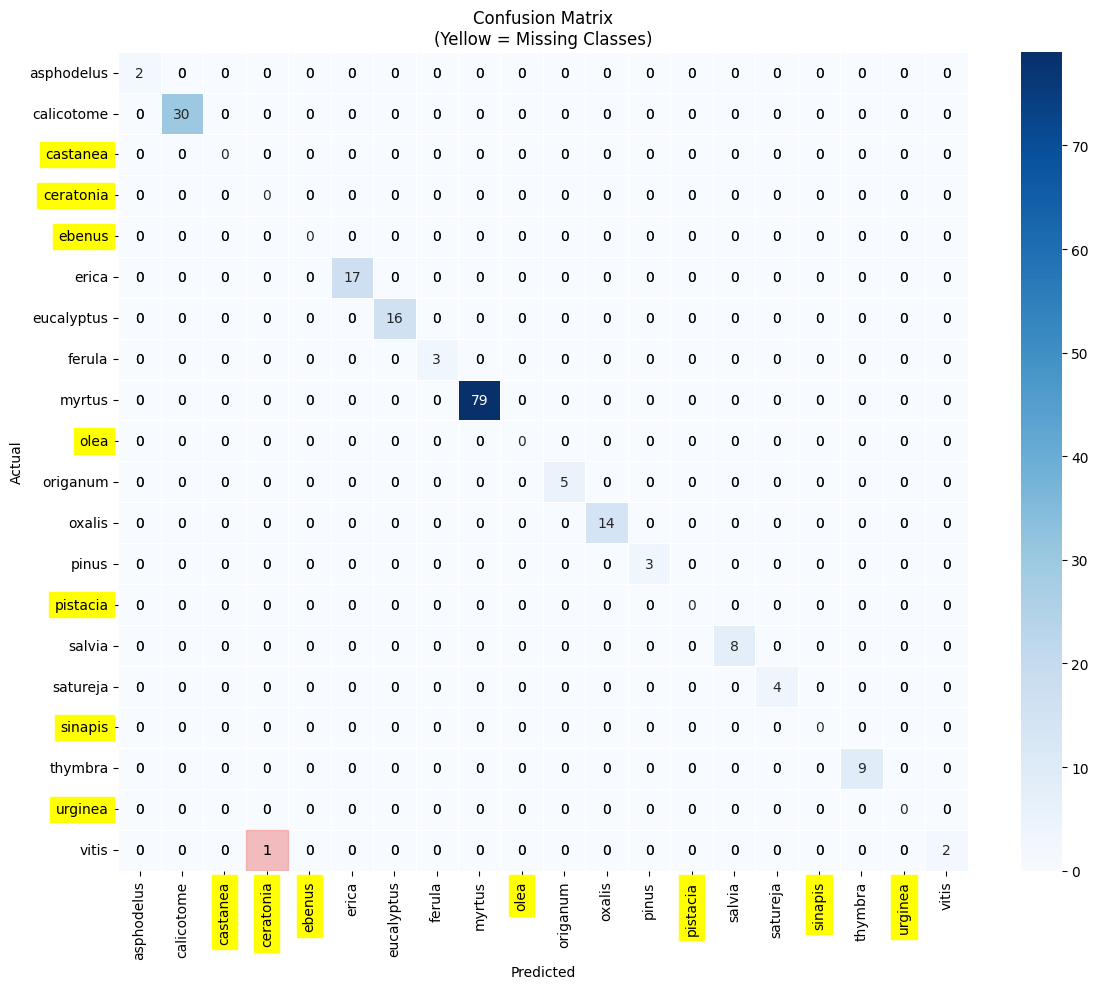

In [40]:
generate_confusion_matrix(y_true_mapped, categories, y_pred, present_labels, normalize=False)

# Class reports